In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris_dataset = load_iris()


In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['target_names', 'DESCR', 'data', 'feature_names', 'target'])


In [3]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [5]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [19]:
#The species are encoded as integers from 0 to 2:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print("Target names:\n{}".format(iris_dataset['target_names']))

Target names:
['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris_dataset['data'], iris_dataset['target'], random_state=7)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


<IPython.core.display.Javascript object>


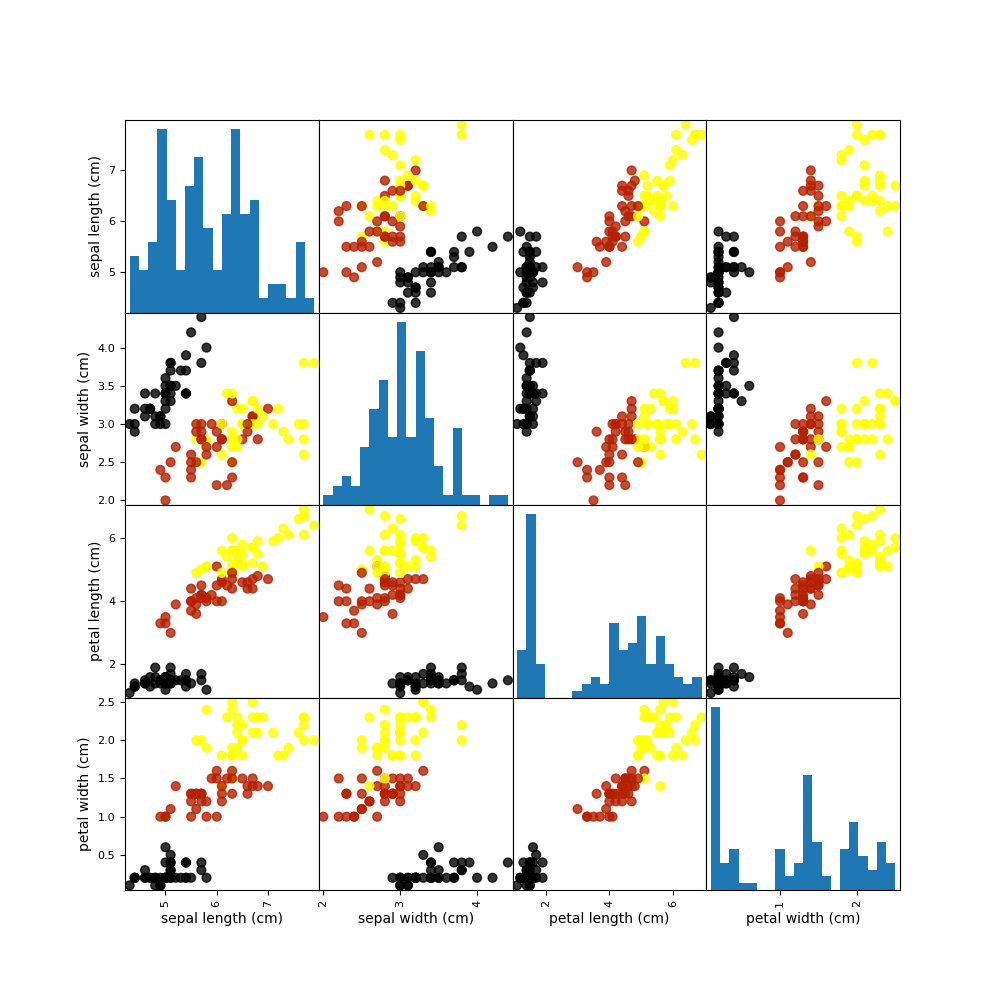

In [10]:
# plotting a scatter matrix
from matplotlib import cm

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
cmap = cm.get_cmap('gnuplot')
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o',hist_kwds={'bins': 20}, s=40, alpha=.8,cmap=cmap)

<IPython.core.display.Javascript object>


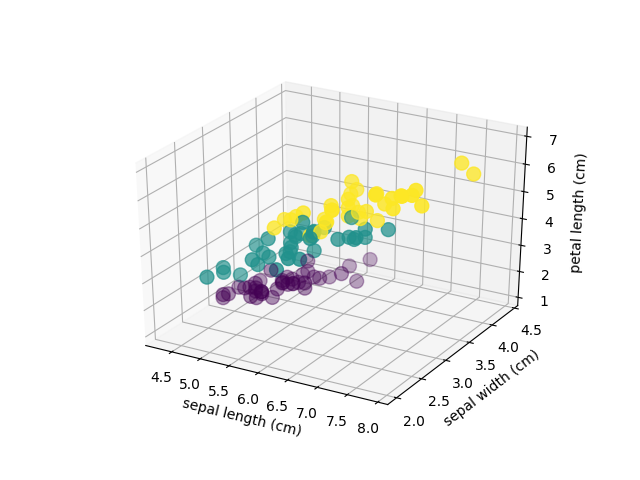

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(iris_dataframe[iris_dataframe.columns[0]], iris_dataframe[iris_dataframe.columns[1]], iris_dataframe[iris_dataframe.columns[2]], c = y_train, marker = 'o', s=100)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.show()

<IPython.core.display.Javascript object>


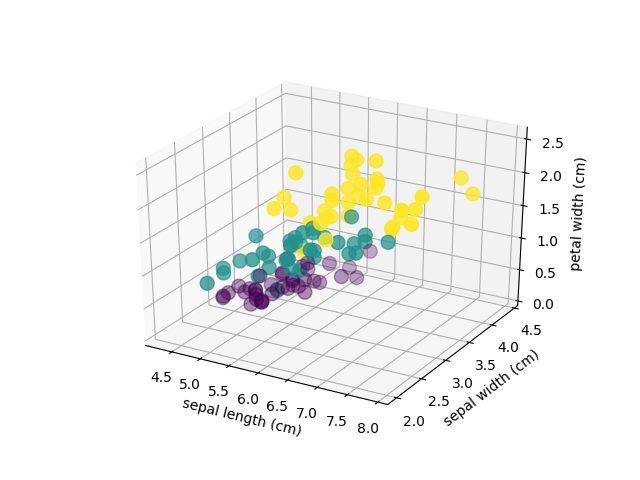

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(iris_dataframe[iris_dataframe.columns[0]], iris_dataframe[iris_dataframe.columns[1]], iris_dataframe[iris_dataframe.columns[3]], c = y_train, marker = 'o', s=100)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal width (cm)')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) #Ir modificando k

#The knn object encapsulates the algorithm that will be used to build the model from
#the training data, as well the algorithm to make predictions on new data points. It will
#also hold the information that the algorithm has extracted from the training data. In
#the case of KNeighborsClassifier, it will just store the training set.

In [14]:
#The fit method returns the knn object itself (and modifies it in place), so we get a
#string representation of our classifier. The representation shows us which parameters
#were used in creating the model. Nearly all of them are the default values, but you can
#also find n_neighbors=1, which is the parameter that we passed. 
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Test set score: 0.895


In [16]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)


In [17]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


<IPython.core.display.Javascript object>


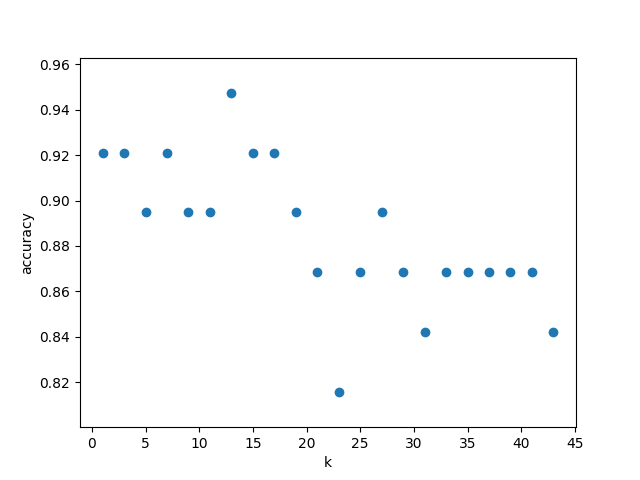

In [18]:
k_range = range(1,45,2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45]);